# Description:

This is my personal Python classification project.

- Conducted a quick Exploratory Data Analysis (EDA) for initial observations of dataset characteristics.
- Utilized an imputer to fill missing data, ensuring a comprehensive dataset.
- Applied a scaler for improved accuracy in data representation.
- These steps, including thorough data exploration, effective handling of missing values, and optimization for accurate predictions, collectively contribute to a robust foundation for the classification model.


## Latest Update: 

dataset : https://www.kaggle.com/datasets/adityakadiwal/water-potability

<a id="0"></a> <br>
# Table of Contents

1. [Importing Data](#1)


1. [Evaluate Data Integrity and Address Missing Values](#2)
    1. [Hello World](#10)

<a id="1"></a> 
## #1. Importing Data

In [43]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data_water = pd.read_csv("../data/water_quality_prediction_data/water_potability.csv", index_col=None)
data_ori = data_water.copy()

In [45]:
# Quck overview of the data
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<a id="2"></a> 
## #2. Evaluate Data Integrity and Address Missing Values

In [46]:
# Identify a missing data
data_water.isnull().sum()/len(data_water)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [47]:
# Validate for duplicate data entries
data_water.duplicated().sum()

0

    The chosen percentage threshold for handling missing values in this analysis is set at 20%. Consequently, the 'Sulfate' column has been dropped from the dataset. This decision ensures that variables with missing values exceeding the defined threshold are appropriately managed in the analysis

In [48]:
target = 'Potability'
missing = 'Sulfate'

data_water.drop(columns=missing, inplace=True)
X, y = data_water.drop(columns=target), data_water[target]

X2, y2 = X,y

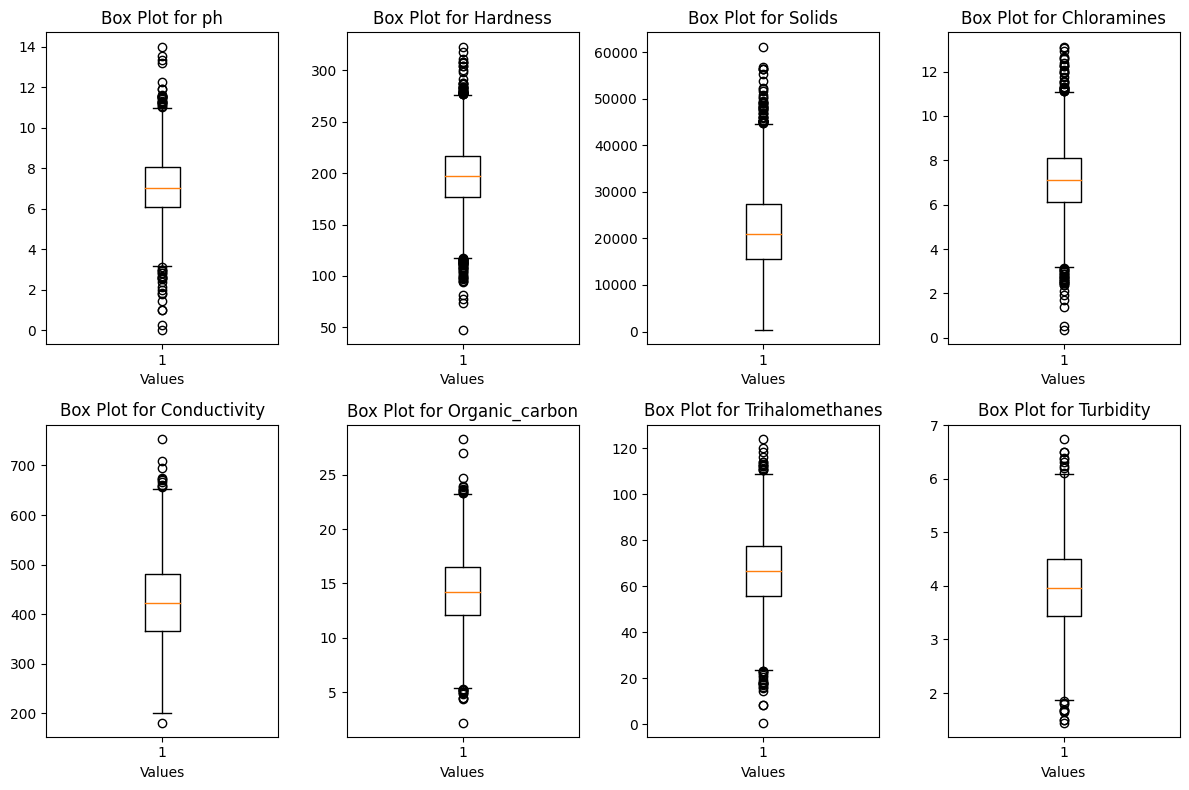

In [49]:
# Set the figure size for the subplots
plt.figure(figsize=(12,8))

# Iterate through the columns and create individual box plots
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, len(X.columns) //2, i)  # Create a subplot for each column
    plt.boxplot(X[column].dropna())
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('')

plt.tight_layout()  # Adjust subplot spacing

plt.show()

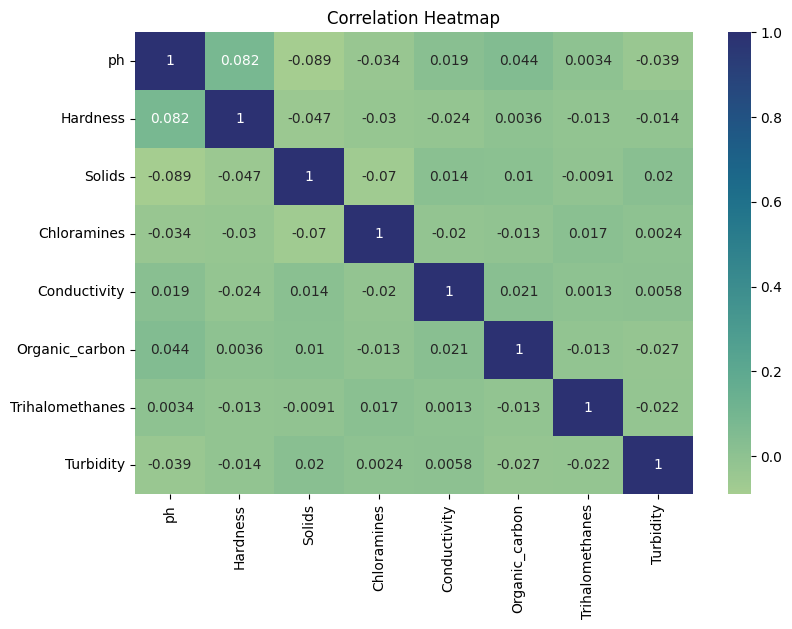

In [50]:

plt.figure(figsize=(9, 6))
sns.heatmap(X.corr(), annot=True, cmap='crest')
plt.title('Correlation Heatmap')

plt.show()

    NOTE: 
    
    Unless we use pipeline , all preprocessing method should be  performed separately on the training and testing sets to avoid information leakage.  

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer # preprocessing for missing value
from imblearn.over_sampling import SMOTE # preprocessing for oversampling
from sklearn.preprocessing import RobustScaler # preprocessing for Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # preprocessing for feature reduction
 #classifiers
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline # pipeline

# List of classifiers to evaluate
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=33),
    RandomForestClassifier(random_state=33),
    SVC(random_state=33),
    GaussianNB(),
    LogisticRegression(random_state=33)
]


X_imputed = KNNImputer(missing_values=np.nan).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=33)

X_train_resampled, y_train_resampled = SMOTE(random_state=33).fit_resample(X_train, y_train)


for classifier in classifiers:
    print("\nName of classifier:" , classifier, "\n")

    pipe = make_pipeline(
        StandardScaler(),
        PCA(n_components=4),
        classifier
        )
    pipe.fit(X_train_resampled, y_train_resampled)
    test_accuracy = pipe.score(X_test, y_test)

    pipe.fit(X_train, y_train)
    test_accuracy_wo = pipe.score(X_test, y_test)

    print("Testing Accuracy with oversampling method:", test_accuracy)
    print("Testing Accuracy without oversampling method:", test_accuracy_wo)


    # Perform cross-validation
    cv_accuracy = cross_val_score(pipe, X_imputed, y, cv=20).mean()
    print("Cross-Validation Mean Accuracy without oversampling method:", cv_accuracy)

#NOTE: running time on random forest longer than other methods


Name of classifier: KNeighborsClassifier() 

Testing Accuracy with oversampling method: 0.5067155067155067
Testing Accuracy without oversampling method: 0.57997557997558
Cross-Validation Mean Accuracy without oversampling method: 0.5674696992368695

Name of classifier: DecisionTreeClassifier(random_state=33) 

Testing Accuracy with oversampling method: 0.5286935286935287
Testing Accuracy without oversampling method: 0.5262515262515263
Cross-Validation Mean Accuracy without oversampling method: 0.5302540026934011

Name of classifier: RandomForestClassifier(random_state=33) 

Testing Accuracy with oversampling method: 0.5262515262515263
Testing Accuracy without oversampling method: 0.5921855921855922
Cross-Validation Mean Accuracy without oversampling method: 0.582745398773006

Name of classifier: SVC(random_state=33) 

Testing Accuracy with oversampling method: 0.514041514041514
Testing Accuracy without oversampling method: 0.6275946275946276
Cross-Validation Mean Accuracy without over

##  takeaways: 

This is my first time using the oversampling method in the analysis. Unfortunately, Overall accuracy of oversampled data was significanlty worse than original scaled data. I thought this was good approach since the sample has unbalance predict value. To effectively utilize oversampling in future work, additional information is needed.

possible reason: overfitting

Furthermore, I will select three classifiers with higher cross-validation scores and conduct in-depth analysis on them. 

 I have selected Support Vector Classifier (SVC), Gaussian Naive Bayes (GaussianNB), and Logistic Regression for further analysis.

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, confusion_matrix, classification_report

# first check with  logistic regression on standard scaled data

top_classifiers = [
    SVC(random_state=33),
    GaussianNB(),
    LogisticRegression(random_state=33)
]

for classifier in top_classifiers:

    pipe = make_pipeline(
        StandardScaler(),
        PCA(n_components=4),
        classifier
        )
    pipe.fit(X_train_resampled, y_train_resampled)


    lgr  = LogisticRegression()
    lgr.fit(X_train, y_train)
    y_pred_lg = lgr.predict(X_test)
    print('Accuracy score for Logistic regression on standard scaled data: ', accuracy_score(y_test, y_pred_lg))
    print('Precision score for Logistic regression on standard scaled data: ', precision_score(y_test, y_pred_lg))
    print()
    print(confusion_matrix(y_test, y_pred_lg))
    print()
    print(classification_report(y_test, y_pred_lg))

[]


In [12]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (2457, 8)
Shape of X_test:  (819, 8)
Shape of y_train:  (2457,)
Shape of y_test:  (819,)


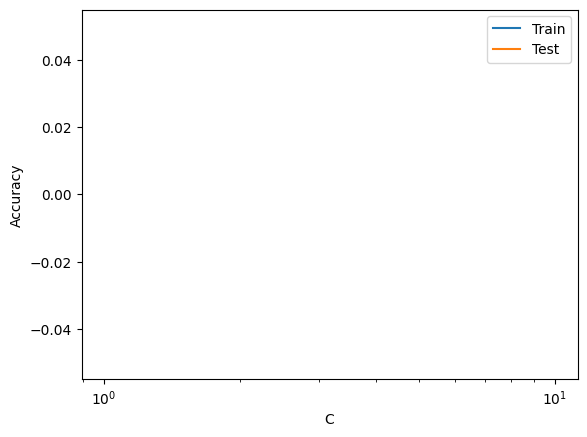

In [13]:
from sklearn.model_selection import ValidationCurveDisplay


_ = ValidationCurveDisplay.from_estimator(
    LogisticRegression(),
    X,
    y,
    param_name="C",
    param_range=np.geomspace(1e-5, 1e3, num=9),
    score_type="both",
    score_name="Accuracy",
)

In [14]:
plt.figure(figsize=(35, 10))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 3500x1000 with 0 Axes>

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))